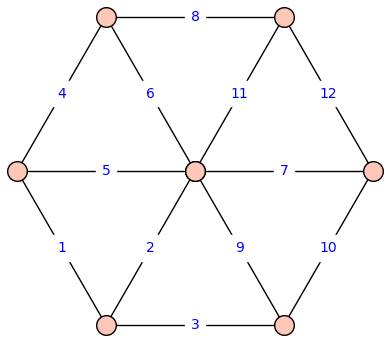

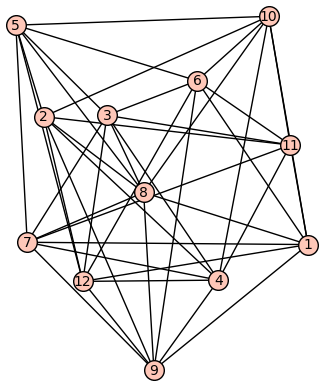

In [55]:
#To plot the cube graph with labeled edges and then compute the 1-skeleton of corresponding matching complex
from sage.graphs.independent_sets import IndependentSets
G = graphs.CubeGraph(3)
i=1
for u,v in G.edge_iterator(labels=None):
    G.set_edge_label(u,v,i)
    i=i+1
G.set_latex_options(scale=3)
G.show(vertex_labels=False, edge_labels=True)
LG=G.line_graph()
#LG.show(vertex_labels=False)
LGc=LG.complement()
LGcv=LG.complement()
#LGc.show(vertex_labels=True)
for v in LGc.vertex_iterator():
    LGcv.relabel({v:v[2]})
LGcv.show()
MC=LGcv.clique_complex()
#The MC variable is the matching complex of graph G.
#MC.faces()

In [56]:
G.edges()

[('000', '001', 1), ('000', '010', 2), ('000', '100', 3), ('001', '011', 4), ('001', '101', 5), ('010', '011', 6), ('010', '110', 7), ('011', '111', 8), ('100', '101', 9), ('100', '110', 10), ('101', '111', 11), ('110', '111', 12)]

In [57]:
#To compute all the edges adjacent to an edge 'e' in graph G
def adjacent_edges(G, e):
    global b
    E=list()
    for c in G.edges():
        if c[2]==e:
            b=c
    for a in G.edges():
        if a[2] != e:
            if b[0] == a[0] or b[1] == a[0] or b[0] == a[1] or b[1] == a[1]:
                E.append(a[2])
    return E

In [58]:
#Converts a dictionary to a set
def dict_to_set(X):
    SC={}
    for i in X:
        SC = X[i].union(SC)
    return(SC)


In [59]:
#Converts the tuples into frozen set for toggling purpose
def tuples_to_sets(X):
    set_of_sets=set()
    set_of_sets = set(frozenset(i) for i in X)
    return(set_of_sets)

In [60]:

#To compute the toggling by edge 'a'
def Toggle(C_tuples,C_sets,a):
    Critical=list()
    for face in C_tuples:
        if {a}.symmetric_difference(frozenset(face)) not in C_sets:
            Critical.append(face)
    #print("The critical cells after toggling with", a, "are:\n", Critical)
    return Critical;

In [61]:
#Returns the total number of simplices in X of size greater than a 
def surplus_size(X,a): 
    surplus=list()
    for face in X:
        if len(frozenset(face))> a:
            surplus.append(face)
    return len(surplus)



#Returns all those simplices in X of size greater than a
def surplus_simplices(X,a): 
    surplus=list()
    for face in X:
        if len(frozenset(face))> a:
            surplus.append(face)
    return surplus



#Returns the maximum dimension of any simplex in X
def max_dimension(X): 
    n=0
    for face in X:
        if len(frozenset(face))> n:
            n=len(frozenset(face))
    return n

In [63]:
z=len(LG)+1
z

13

In [64]:
#To compute the edges adjacent to every edge in cube complex of dimension 32
L=[None]*z
for i in range (1, z):
    L[i]=adjacent_edges(G,i)
    print("Edges adjacent to the edge", i ,"are: ", L[i])
K=[1,2,3,4]
for i in range (1, z):
    for j in L[i]:
        if j not in K:
            K.append(j)
K

Edges adjacent to the edge 1 are:  [2, 3, 4, 5]
Edges adjacent to the edge 2 are:  [1, 3, 6, 7]
Edges adjacent to the edge 3 are:  [1, 2, 9, 10]
Edges adjacent to the edge 4 are:  [1, 5, 6, 8]
Edges adjacent to the edge 5 are:  [1, 4, 9, 11]
Edges adjacent to the edge 6 are:  [2, 4, 7, 8]
Edges adjacent to the edge 7 are:  [2, 6, 10, 12]
Edges adjacent to the edge 8 are:  [4, 6, 11, 12]
Edges adjacent to the edge 9 are:  [3, 5, 10, 11]
Edges adjacent to the edge 10 are:  [3, 7, 9, 12]
Edges adjacent to the edge 11 are:  [5, 8, 9, 12]
Edges adjacent to the edge 12 are:  [7, 8, 10, 11]


[1, 2, 3, 4, 5, 6, 7, 9, 10, 8, 11, 12]

In [65]:
#To perform toggling by all edges and compute the toggled complex at every stage.
MC_tuples=dict_to_set(MC.faces())
MC_sets=tuples_to_sets(MC_tuples)
T=[None]*z
T[0]=Toggle(MC_tuples,MC_sets,1)

for i in range (1,len(LG)):
    T[i]=Toggle(T[i-1],tuples_to_sets(T[i-1]),K[i])

In [66]:
#To compute the dimension of toggled complex at every stage.
for i in range (0,len(LG)):
    print(max_dimension(T[i]))

4
4
3
3
3
3
3
3
3
3
3
3


In [ ]:

#Total number of 6 simplices remaining at every stage after toggling.
for i in range (0,len(LG)):
    print(surplus_size(T[i],6)-surplus_size(T[i],7))

In [14]:
def six_simplices(X):
    S=list()
    for face in X:
        if len(frozenset(face))==7:
            S.append(face)
    return S

def five_simplices(X):
    S=list()
    for face in X:
        if len(frozenset(face))==6:
            S.append(face)
    return S

In [15]:
#Returns the number/s that appear the most number of times in a list of tuples.
from collections import Counter

def most_frequent(lst):
    flat_list = [item for sublist in lst for item in sublist]
    return [k for k, v in Counter(flat_list).items() if v == max(Counter(flat_list).values())]

In [16]:
for i in range(0,32):
    print(most_frequent(six_simplices(T[i])))


[3, 6, 5, 2, 7, 4]
[3, 4]
[4]
[4]
[4]
[4]
[4]
[4]
[8]
[8]
[8]
[8]
[8]
[8]
[23]
[8]
[8]
[8]
[8]
[13]
[13]
[13]
[13]
[14, 21]
[27]
[13, 29, 14, 30, 10]
[10]
[10]
[30, 31]
[]
[]
[]


In [17]:
for i in range(0,32):
    print(most_frequent(five_simplices(T[i])))

[4, 7, 3, 5, 6, 2]
[4, 3]
[4]
[4]
[4]
[4]
[4]
[4]
[3]
[3]
[3]
[3]
[3]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
